# Project 1

Fertility rate and wage gap we dont know what the Q is yet.

Copyright 2018 Mahima Beltur and Jocelyn Jimenez

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


## THE QUESTION

A change in women's employment rate is causing an effect on national fertility rates. What will the fertility rate be when the employment rate of women is equivalent to that of men?

## THE BACKGROUND

One of the hottest topics of the centurty focuses on feminism and gender equality. We often hear endless statistics and stories about how women were historically treated as inferior, and how these societal qualities are merely hidden today rather than being completely resolved. One such issue revolves around the question of women being employed and being the breadwinner of the family as opposed to playing the more traditional role of the housewife and mother. We were also quite curious about the progression in income inequality (another popular topic) and how that has and will change over time. We first began by questioning the woman's role as a mother. As time goes by, the fertility rates in the United States has been decreasing. This decrease coincides with a dramatic increase in women's employment rates over the years. According to Geodele Van Den Broek and Miet Maetens study (https://tinyurl.com/y7kdta8k), an increase in working women is the cause of the decrease in fertility rates. 

The first step of the project was to find all the necessary data. We found a yearly cenus of the percentage of employment by gender between 1960 and 2016 and a yearly cencus of fertility rates spanning the same amount of time, and then plotted them:

In [526]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *


In [527]:
#Importing csv file of Fertility data into code
import csv
file = open ('Fertility data.csv')
table= csv.reader(file)
time= [] #Setting emtpy sets for variables 'years' and 'fertility'
fertility= []
for i, row in enumerate(table): #adding values to 'years' and 'fertility' going through each row of the csv file individually
    if i > 0:
        year = float(row[0])
        rate = float(row[1])
        time.append(year) #adding each value onto the end of the list
        fertility.append(rate)   

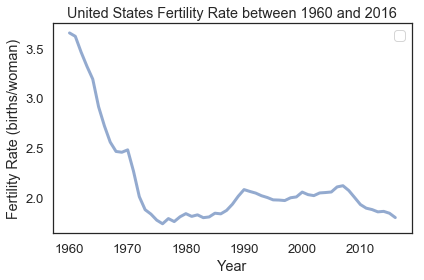

In [528]:
#Plotting Fertility Data
plot(time, fertility) 
decorate(xlabel='Year', 
             ylabel='Fertility Rate (births/woman)',
             title='United States Fertility Rate between 1960 and 2016')

In [529]:
file2 = open('Employment.csv') #Importing csv file of employed mothers data into code
table2= csv.reader(file2)
timez= [] #Setting emtpy sets for variables 'time' and the income ratio, 'percentage'
percentageW = []
percentageM = []
for i, row in enumerate(table2): #adding values to 'years' and 'fertility' going through each row of the csv file individually
    if i > 0:
        times = float(row[0])
        fraction = float(row[1])
        percentage = float(row[2])
        timez.append(times) #adding each value onto the end of the list
        percentageW.append(fraction)  
        percentageM.append(percentage)

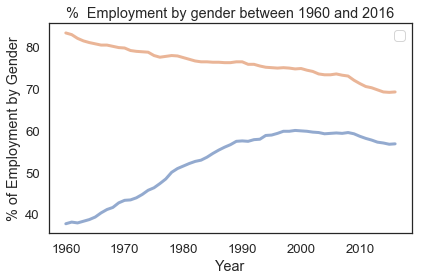

In [530]:
#Plotting Employment data
plot(timez, percentageW)
plot(timez, percentageM)
decorate(xlabel='Year', 
             ylabel='% of Employment by Gender',
             title='%  Employment by gender between 1960 and 2016') 

This previous steps shows the importing of a csv data files into python. For each csv filee, we then converted the data into two seperate lists by setting empty sets as varialbes. We then went through the data (using code) row by row and appended each value onto their respective lists. 

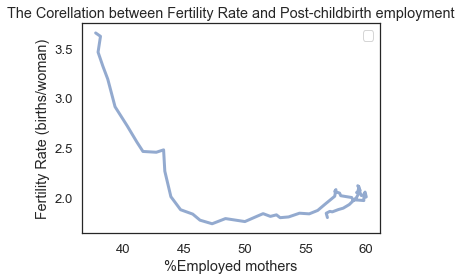

In [531]:
#Plotting Employed Mothers data against Fertility data
plot(percentageW, fertility )
decorate(xlabel='%Employed mothers', 
             ylabel='Fertility Rate (births/woman)',
             title='The Corellation between Fertility Rate and Post-childbirth employment')

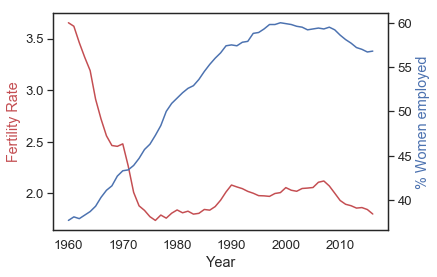

In [532]:
x = time

fig, ax1 = plt.subplots() #setting up to have two y axes on the same plot as subplots
ax2 = ax1.twinx()

ax1.plot(x,fertility,'r-') #plotting fertility rate
ax2.plot(x, percentageW, 'b-') #plotting employment
ax1.set_xlabel('Year') #setting x lable
ax1.set_ylabel('Fertility Rate', color = 'r') #setting first y label, specific to fertility rate
ax2.set_ylabel('% Women employed', color = 'b') #setting second y label, specific to employment
plt.show()


To confirm that our hunch was correct, and that an increase in women's employment rate was indeed causing a drop in fertility rate, we graphed the two values against each other. The correlation is irrefutable. We also graphed the fertility data and the percentage of employed women on the same axes to see the progression of these correlations through time. We can see the drastic decrease in the 1970s during the recesion during which the employment of women grows inversely.

## THE CODE

The following section of code begins to lay the groundworks of the model. We establish the necessary values for the state values by calling the the first values of all three lists and set it as a state value, "init": 

In [533]:
first_women = percentageW[-57] #percentage of employed women in 1960
first_men = percentageM[-57] #percentage of employed men in 1960
baby = fertility[-57] #fertility rate 1960

3.654

In [534]:
init = State(women = first_women, # setting three values above as state values
              men = first_men, 
              fertility_rate = baby )

,values
women,37.700
men,83.300
fertility_rate,3.654


The system values sets the constants necessary for finding the equations necessary to model the change of all three variables through time. We start with the almost linear decrease in the percentage of employed men, "rate_changeM":

In [535]:
rate_changeM = (percentageM[-57] - percentageM[-1])/(2016-1960) #change in rate of men's employment: change in employment/time
print(rate_changeM)
rate_changeFert = (fertility[-57] - fertility[-1])/(2016-1960) #change in fertility rate

0.25178571428571417


0.033107142857142856

In [540]:
system = System(growthM = rate_changeM, #rate of chenge in men's employment
              growthW = 0.39, # rate of change in women's employment
              women_quitting_rate = 0.91, #rate of wome quitting workforce due to childbirth
              growthFert = rate_changeFert, #change in fertility rate
              t_0 = 1960, #first year in consideration
              t_end = 2080, #last year to project to
              init = init #initial state
              )

,values
growthM,0.251786
growthW,0.39
women_quitting_rate,0.91
growthFert,0.0331071
t_0,1960
t_end,2080
init,women 37.700 men 83....


The following code defines the function used to write the equations of the model for each of the three datasets:

In [541]:
def update_func1(state, t, system):
    
    change_fertility = state.fertility_rate - system.growthFert 
    #model for change in fertility rate

    change_women =  abs(state.women + (system.growthW * state.women) - (system.women_quitting_rate * state.women))
    #change in employment rate in women as a funtion of increase in women's employment and average rate of quitting
    #due to childbirth
    
    change_men = state.men - system.growthM #function for men's employment
    
    return State(women = change_women, men = change_men, fertility_rate = change_fertility)

In [543]:
state = update_func1(init, system.t_0, system) #updating the state with results from update_func1

,values
women,18.096000
men,83.048214
fertility_rate,3.620893


Now we defined run_simulation, which applies updtate_func1 to the state values repeatedly until there is one value for each year between 2016 and 2080. We then plot all six graphs, three sets of data and three models on the same set of axes. We manipulated our constants to best fit our data as well as we could. However, for the model of women's employment, we weren't able to get the desired shape with a quadratic model, no matter how hard we tried. This was the best result. 

In [544]:
def run_simulation(system, update_func): #running the model 
    results1 = TimeSeries() #results series for each individual data set
    results2 = TimeSeries()
    results3 = TimeSeries()
    
    
    state = system.init
  
    for t in linrange(system.t_0, system.t_end): #for loop running through all three years
        state = update_func1(state, t, system) #starting with initial state
        results1[t] = -state.women+55 #updating the state value for each dataset and storing daata value under results
        results2[t] = state.men
        results3[t] = state.fertility_rate
    return results1, results2, results3 #returning lists


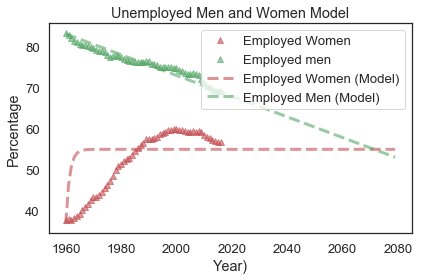

In [545]:
results = run_simulation(system, update_func1) #running simulation from 2016 to 2066
years = linrange(1960,2080) #setting time variable
plot(time, percentageW,'r^', label = 'Employed Women') #plotting data
plot(time, percentageM,'g^', label = 'Employed men')

plot(years, results[0], 'r--', label = 'Employed Women (Model)') #plotting model
plot(years, results[1],'g--', label = 'Employed Men (Model)')

decorate(xlabel='Year)', 
             ylabel='Percentage',
             title='Unemployed Men and Women Model') 


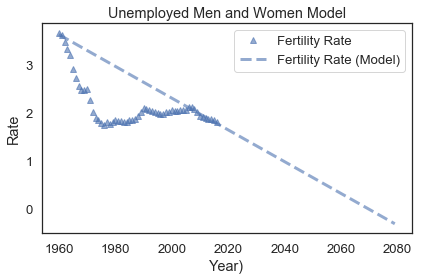

In [546]:
plot(time, fertility,'b^', label = 'Fertility Rate')
plot(years, results[2], 'b--', label = 'Fertility Rate (Model)')
decorate(xlabel='Year)', 
             ylabel='Rate',
             title='Unemployed Men and Women Model') 


## CONCLUSIONS

As we can see from the graph above, we should expect that the employment rates of both men and women will balance out at around 2075. However considering that the model is quite inaccurate, due to the fact that women's employment model is very inaccurate, this result cannot be trusted. This can also be seen from the data for the fertility rates. We tried both the quadtratic and linear model and decided that the linear was slightly more accurate-- the quadratic model wouldn't meet the any of the data points. It seems from the most recent data that women's employment, along with men's employment is decreasing, which may be a reflection of the many complaints the youth have about the difficulties of finding jobs in the modern markets. 

Interestingly, the fertility rate also seems to continue downards, closer and closer to zero children as time goes by (we estimate that this would more reallistically tend to one),which may indiciate that the future will show a decline in population growth even though more women may "stay at home." This may show that the population of the United States are feeling more disinclined to have children in general, or that they may not be able to have the children they want for some external reason. 

Out of curostity, we decided to graph the trends in income inequality between working men and women in the United States along the same period of time. There is a strong correlation between the increase in employment women and an increase in the ratio between men's and women's wages. Therefore, if an increase in women's employment causes a decrease in fertility, we can conlude that a decrease in fertility, suggests, but does not necessarily cause, a decrease in income inequality.

In [479]:
file2 = open ('Male-FemaleRatio.csv') #Importing csv file of Income Inequality data into code
table2= csv.reader(file2)
time= [] #Setting emtpy sets for variables 'time' and the income ratio, 'ratio'
ratio= []
for i, row in enumerate(table2): #adding values to 'time' and 'ratio' going through each row of the csv file individually
    if i > 0:
        if row[0]:#There was an empty cell that could not be found or deleted; the data will only be added if the cell has data
            times = float(row[0])
            time.append(times)  #adding each value onto the end of the list
        if row[1]:
            wage = float(row[1])
            ratio.append(wage)   #adding each value onto the end of the list 

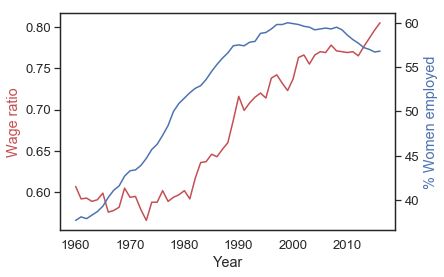

In [482]:
#Plotting Income Inequality Data and Employment of women
fig, ax3 = plt.subplots() #setting up to have two y axes on the same plot as subplots
ax4 = ax3.twinx()

ax3.plot(x, ratio,'r-') #plotting fertility rate
ax4.plot(x, percentageW, 'b-') #plotting employment
ax3.set_xlabel('Year') #setting x lable
ax3.set_ylabel('Wage ratio', color = 'r') #setting first y label, specific to fertility rate
ax4.set_ylabel('% Women employed', color = 'b') #setting second y label, specific to employment
plt.show()
